In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_uci.csv to heart_disease_uci (3).csv


In [ ]:
#1. loading the dataset
import pandas as pd

df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
#2. data collection
df.drop(columns=['id', 'dataset'], inplace=True, errors='ignore')

# filling missing numeric values
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# filling missing categorical values
cat_cols = ['slope', 'thal', 'restecg']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# converting 'num' to binary 'target'
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

# one-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [ ]:
#3. feature/label split
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
#4. train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 5. applying SMOTE for class balancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
#6. featuring scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 7.XGBoost with hyperparameter tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("✅ Best Parameters:", grid_search.best_params_)

✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
#8. prediction with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


✅ Tuned XGBoost Accuracy: 0.8532608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



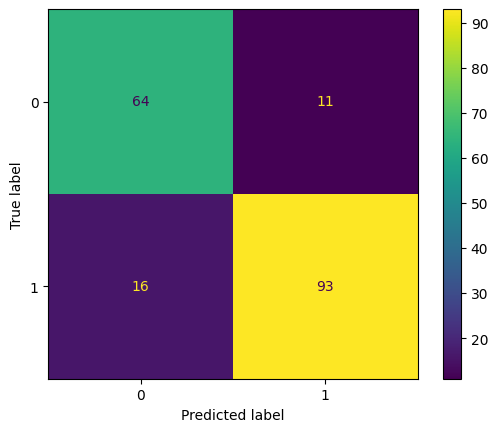

In [ ]:
# 9. evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("✅ Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_uci.csv to heart_disease_uci (2).csv


In [ ]:
import pandas as pd

df = pd.read_csv('heart_disease_uci.csv')
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.info()

# checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Missing values in each column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
c

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#loading dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.drop(columns=['id', 'dataset'], inplace=True, errors='ignore')

num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
existing_num_cols = [col for col in num_cols if col in df.columns]
for col in existing_num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = ['slope', 'thal', 'restecg']
existing_cat_cols = [col for col in cat_cols if col in df.columns]
for col in existing_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.7989130434782609
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        75
           1       0.85      0.80      0.82       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184



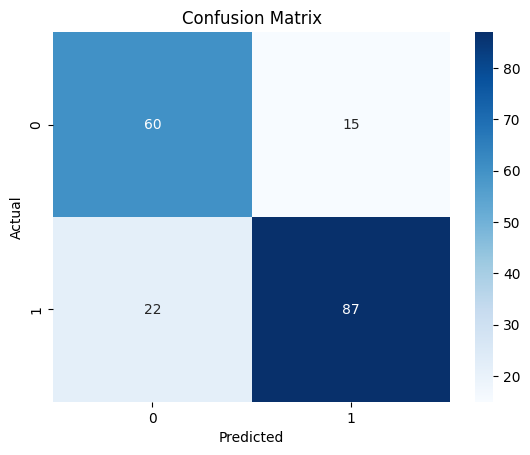

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        75
           1       0.90      0.85      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



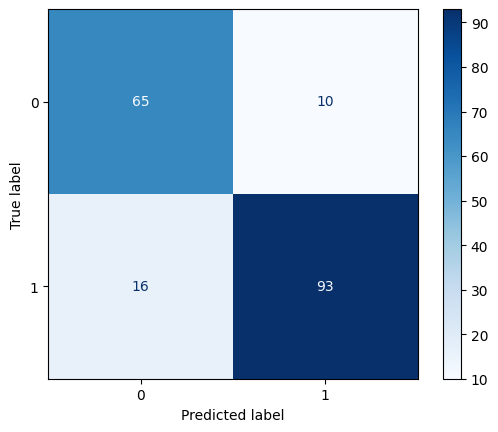

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')


In [ ]:
from sklearn.metrics import accuracy_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7989130434782609
Random Forest Accuracy: 0.8586956521739131


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.8261077403934547


Tuned Random Forest Accuracy: 0.842391304347826


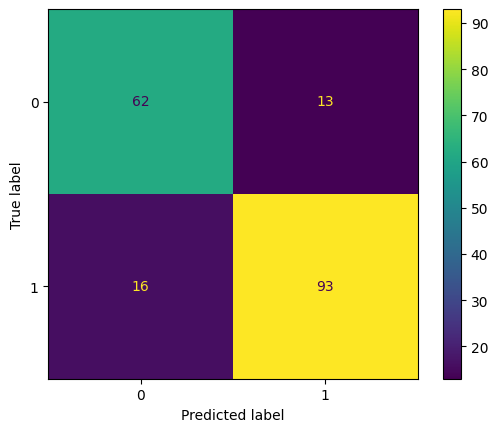

In [ ]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
!pip install xgboost


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


XGBoost Accuracy: 0.8641304347826086


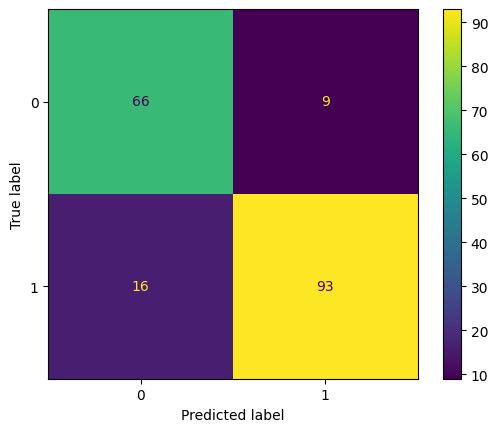

In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
